<a href="https://colab.research.google.com/github/pgpanagiotidis/Hypothesis-testing/blob/main/Independent_Samples_Non_Parametric_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Generic imports we will need
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
df_performance = pd.read_csv('student-math-performance.csv')

In [23]:
print(df_performance.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [37]:
#calculate the frequencies of the students that want to take higher education and those who do not want
counts = df_performance['higher'].value_counts().to_dict()
print(counts)

{1: 375, 'no': 20}


In [41]:
df_performance=df_performance.replace({'higher' : { 'yes' : 1, 'no': 0 }})

In [42]:
# Subset data
higher = df_performance.query('higher == 1')['G3']
no_higher= df_performance.query('higher == 0')['G3']

In [43]:
#some descriptive statistics for the final grade for each group
df_performance.groupby('higher')['G3'].describe()

,count,mean,std,min,25%,50%,75%,max
higher,,,,,,,,
0,20.0,6.800,4.829732,0.0,0.0,8.0,10.0,13.0
1,375.0,10.608,4.493422,0.0,9.0,11.0,14.0,20.0


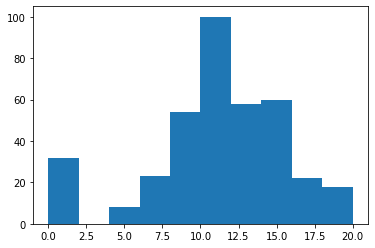

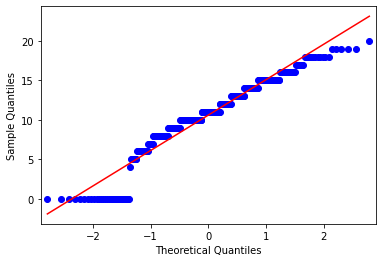

In [44]:
#checking the Normality of Data for the students that want to take higher education
# histogram plot
pyplot.hist(higher)
pyplot.show()
# q-q plot
qqplot(higher, line='s')
pyplot.show()

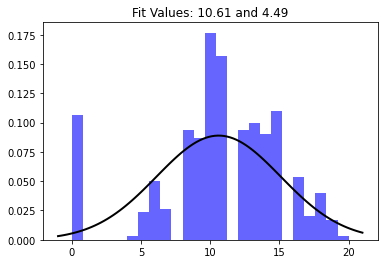

In [45]:
# Fit a normal distribution to the data for the students that want to take higher education
# mean and standard deviation
mu, std = norm.fit(higher) 
  
# Plot the histogram.
plt.hist(higher, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

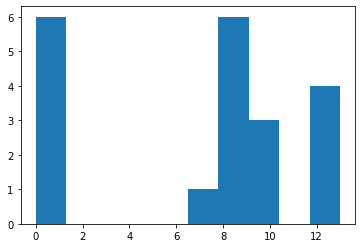

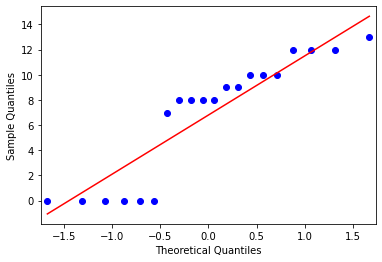

In [46]:
#checking the Normality of Data for the students that do not want to take higher education
# histogram plot
pyplot.hist(no_higher)
pyplot.show()
# q-q plot
qqplot(no_higher, line='s')
pyplot.show()

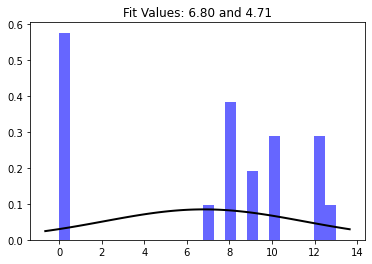

In [47]:
# Fit a normal distribution to the data for the students that do not want to take higher education
# mean and standard deviation
mu, std = norm.fit(no_higher) 
  
# Plot the histogram.
plt.hist(no_higher, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

There is no clear evidence for the normality, so we will also use statistical Normality Tests.

In [51]:
#statistical Normality Tests for the students that want to take higher education
#Shapiro-Wilk Test
stat, p = shapiro(higher)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.932, p=0.000
Sample does not look Gaussian (reject H0)


In [52]:
#statistical Normality Tests for the students that do not want to take higher education
#Shapiro-Wilk Test
stat, p = shapiro(no_higher)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.816, p=0.002
Sample does not look Gaussian (reject H0)


The two samples do not look that come from Gaussian distributions and also the sample of the students that do not want to take higher education is small (i.e., n_no_higher=20). So we have to continue with no parametric tests.

In [48]:
# The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test

# Fail to Reject H0: Sample distributions are equal.
# Reject H0: Sample distributions are not equal.
stat, p = mannwhitneyu(higher, no_higher)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2054.500, p=0.000
Different distribution (reject H0)


The two samples do not look like they come from Gaussian distributions, and also, the sample of the students that do not want to take higher education is small (i.e., n_no_higher=20). So we have to continue with no parametric tests.

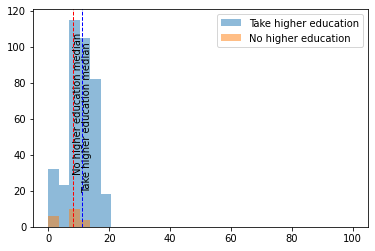

In [53]:
#plot the distribution and the median of each group
bins = np.linspace(0, 100, 30)
pyplot.hist(higher, bins, alpha=0.5, label='Take higher education')
pyplot.hist(no_higher, bins, alpha=0.5, label='No higher education')
plt.axvline(higher.median(), color='b', linestyle='dashed', linewidth=1)
plt.text(higher.median()+0.15,20,'Take higher education median',rotation=90)
plt.axvline(no_higher.median(), color='r', linestyle='dashed', linewidth=1)
plt.text(no_higher.median()+0.15,30,'No higher education median',rotation=90)
pyplot.legend(loc='upper right')
pyplot.show()

As we can identify from the plot above, the students' median that wants to take higher education seems to be greater than the median of students who do not want to take higher education regarding the performance in maths.